In [26]:
import utils
import dotenv
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [27]:
dotenv.load_dotenv()

True

In [28]:
df = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefined.csv')

In [29]:
df

,subject_id,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,...,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,discharge_location_SNF-MEDICAID ONLY CERTIF,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay
0,3,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,...,False,False,False,True,False,False,False,True,False,False
1,9,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,...,False,False,False,False,False,False,True,False,False,False
2,21,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,...,False,False,False,False,False,False,False,True,False,False
3,25,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,...,False,False,False,False,False,False,False,False,True,False
4,31,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,99913,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,...,False,False,False,False,False,False,False,True,False,False
10189,99922,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,...,False,False,False,False,False,False,False,True,False,False
10190,99923,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,...,False,False,False,False,False,False,False,False,True,False
10191,99944,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,...,False,False,False,True,False,False,False,True,False,False


In [30]:
df_subject_mr = utils.aggregate_score_to_mortality()
df_subject_mr

Connected to the PostgreSQL database
PostgreSQL version: PostgreSQL 14.0, compiled by Visual C++ build 1914, 64-bit


,subject_id,mr_lods
0,25225,0.104107
1,15574,0.048017
2,52619,0.048017
3,85940,0.048017
4,12411,0.288948
...,...,...
61046,3793,0.149936
61047,11099,0.288948
61048,93831,0.071114
61049,50334,0.104107


In [31]:
df = df.merge(df_subject_mr.drop_duplicates(subset='subject_id'), on='subject_id', how='left')
df

,subject_id,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,...,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,discharge_location_SNF-MEDICAID ONLY CERTIF,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,mr_lods
0,3,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,...,False,False,True,False,False,False,True,False,False,0.683240
1,9,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,...,False,False,False,False,False,True,False,False,False,0.149936
2,21,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,...,False,False,False,False,False,False,True,False,False,0.483531
3,25,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,...,False,False,False,False,False,False,False,True,False,0.288948
4,31,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,...,False,False,False,False,False,False,True,False,False,0.104107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,99913,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,...,False,False,False,False,False,False,True,False,False,0.149936
10189,99922,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,...,False,False,False,False,False,False,True,False,False,0.149936
10190,99923,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,...,False,False,False,False,False,False,False,True,False,0.483531
10191,99944,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,...,False,False,True,False,False,False,True,False,False,0.104107


In [32]:
df['icu_level'] = df['mr_lods'].apply(utils.map_mortality_rate_to_icu_level)
df['icu_level']

0        Level 3
1        Level 1
2        Level 2
3        Level 1
4        Level 1
          ...   
10188    Level 1
10189    Level 1
10190    Level 2
10191    Level 1
10192    Level 1
Name: icu_level, Length: 10193, dtype: object

In [33]:
df["icu_level"].describe()

count       10193
unique          3
top       Level 1
freq         7807
Name: icu_level, dtype: object

In [34]:
df["icu_level"].groupby(df["icu_level"]).count()

icu_level
Level 1    7807
Level 2    1685
Level 3     701
Name: icu_level, dtype: int64

In [35]:
columns_to_remove = ["subject_id", "hadm_id", "icustay_id", "mr_lods"]
df = df.drop(columns_to_remove, axis=1)

In [36]:
y = df['icu_level']
X = df.drop(columns=['icu_level'])

In [37]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([2, 0, 1, ..., 1, 0, 0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [39]:
random_forest_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
naive_bayes_model = GaussianNB()
xgb_model = xgb.XGBClassifier(random_state=42)
catboost_model = cb.CatBoostClassifier(random_state=42, verbose=0)

In [40]:
ensemble_models = [
    ('Random Forest', random_forest_model),
    ('GBM', gbm_model),
    ('SVM', svm_model),
    ('Logistic Regression', logistic_regression_model),
    ('Naive Bayes', naive_bayes_model),
    ('XGBoost', xgb_model),
    # ('CatBoost', catboost_model),
]

In [41]:
hard_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

In [42]:
soft_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

In [43]:
models = [random_forest_model, gbm_model, svm_model,
          logistic_regression_model, naive_bayes_model, xgb_model,
          hard_voting_ensemble, soft_voting_ensemble]

In [44]:
accuracy_scores = {}
for model in models:    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model.__class__.__name__] = accuracy
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

RandomForestClassifier Accuracy: 0.8127
GradientBoostingClassifier Accuracy: 0.8234
SVC Accuracy: 0.7587


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7646
GaussianNB Accuracy: 0.7612
XGBClassifier Accuracy: 0.8205


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier Accuracy: 0.8073


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier Accuracy: 0.8117


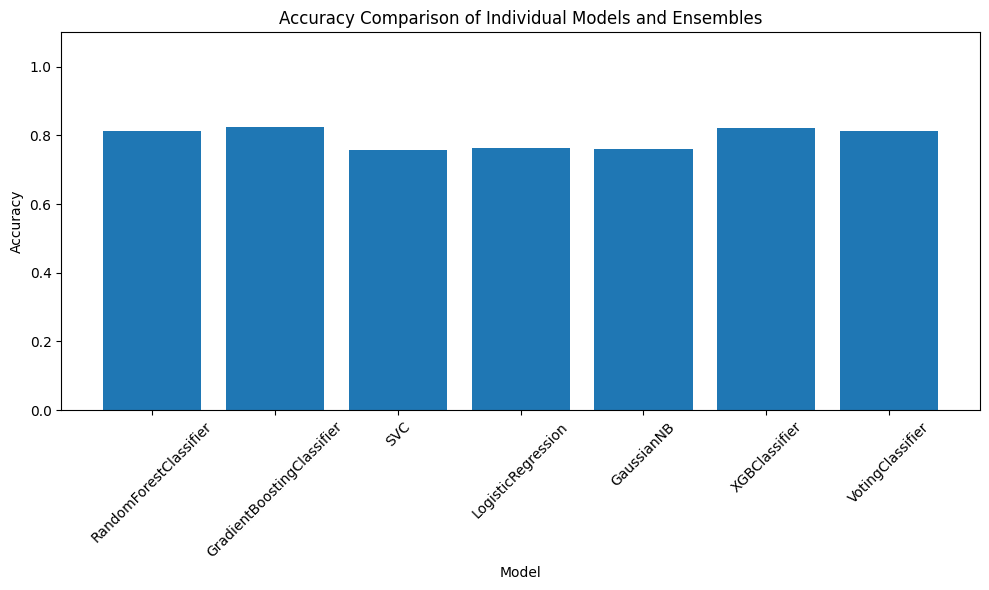

In [45]:
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Individual Models and Ensembles')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


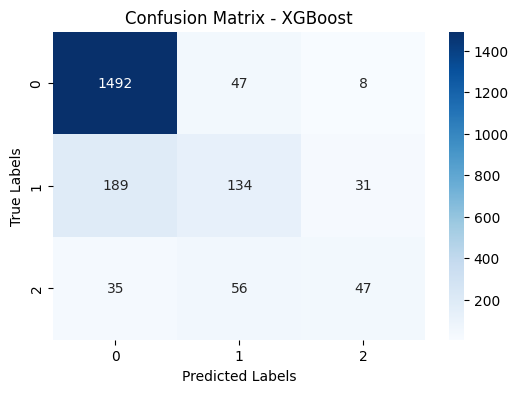

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()


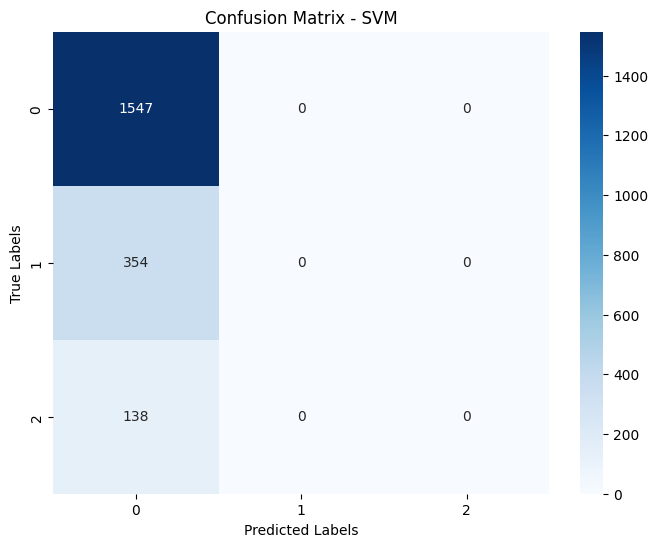

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()


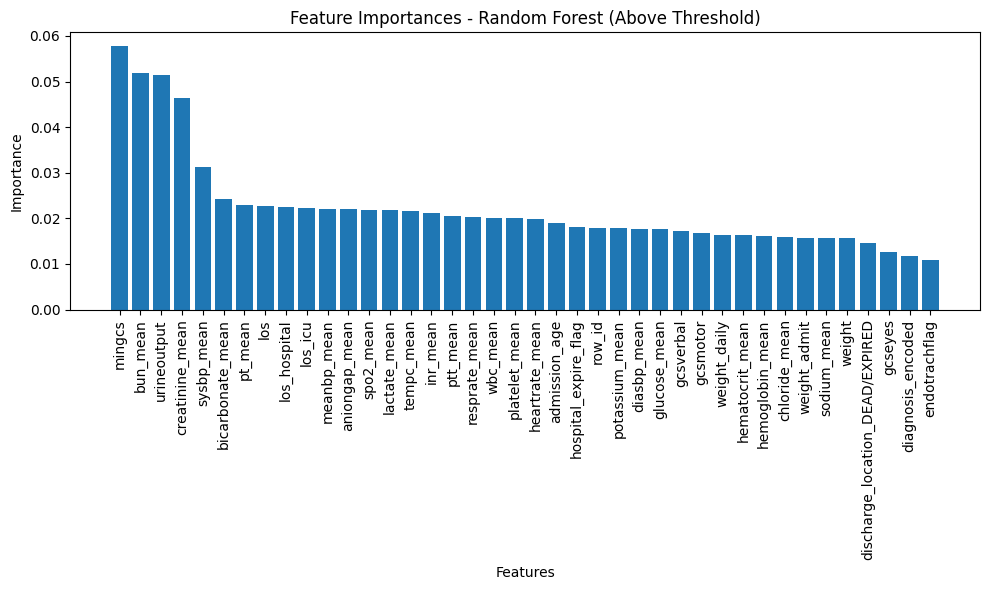

In [48]:
# Set a threshold for feature importance
threshold = 0.01  # You can adjust this threshold as per your preference

# Get the indices of features with importance above the threshold
important_features_idx = sorted_idx_rf[importances_rf[sorted_idx_rf] > threshold]

# Get the corresponding feature importances and feature names
important_importances_rf = importances_rf[important_features_idx]
important_feature_names = X_train.columns[important_features_idx]

# Plot feature importances for the important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_importances_rf)), important_importances_rf, align='center')
plt.xticks(range(len(important_importances_rf)), important_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Above Threshold)')
plt.tight_layout()
plt.show()
